# Analsisa Riset Pasar

Anda telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe Anda bisa dibilang cukup unik, karena Anda "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, namun membutuhkan modal yang besar. Oleh karena itu, Anda dan para mitra Anda memutuskan untuk menarik minat investor. Mereka tertarik dengan kondisi pasar saat ini—namun, mampukah Anda mempertahankan kesuksesan saat daya tarik sang robot mulai pudar?

Mengingat Anda adalah seorang pakar analisis, para mitra pun meminta Anda untuk mempersiapkan sejumlah riset pasar. Anda memiliki data dari sumber terbuka (*open source*) terkait restoran-restoran di LA.

<b>Objektif:</b>
   - Riset pasar restoran-restoran di LA

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
3. [*Exploratory Data Analysis*](#EDA)
    - [Proporsi dari berbagai jenis usaha](#1)
    - [Proporsi dari jenis usaha berbasis waralaba dan non-waralaba](#2)
    - [Jenis usaha yang biasanya merupakan waralaba](#3)
    - [Ciri-ciri dari jenis usaha berbasis waralaba](#4)
    - [Jumlah rata-rata kursi untuk setiap jenis usaha](#5)
    - [Sepuluh nama jalan terbaik berdasarkan jumlah jenis usaha](#6)
    - [Jumlah jalan yang hanya memiliki satu jenis usaha](#7)
    - [Distribusi jumlah kursi pada jalan yang dihuni oleh banyak jenis usaha](#8)
4. [Kesimpulan Umum](#Kesimpulan)
5. [Presentasi](#Presentasi)

In [1]:
# Untuk memisahkan alamat menggunakan library usaddress
!pip install -q usaddress

In [2]:
# Memuat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import re
import usaddress
import warnings
warnings.filterwarnings('ignore')

## Ikhtisar Data <a id="Mulai"></a>

In [3]:
# Dataset
df_rest = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\9 Project\\rest_data_us.csv')

In [4]:
# Informasi umum
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
# Ukuran dataset
df_rest.shape

(9651, 6)

In [6]:
# Sampel data
df_rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Dokumentasi:
- `id` - ID jenis usaha
- `object_name` - nama usaha
- `address` - alamat
- `chain` - usaha berbasis rantai (TRUE/FALSE)
- `object_type` - jenis usaha
- `number` - jumlah kursi

In [7]:
# Memeriksa duplikat
df_rest.duplicated().sum()

0

In [8]:
# Memeriksa missing value
df_rest.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

**Kesimpulan sementara**

1. Terdapat nilai yang hilang pada kolom chain,
2. Tidak terdapat nilai yang terduplikasi,
3. Penamaan kolom, dan tipe data yang sudah bagus

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data <a id="Pra-pemrosesan"></a>

In [9]:
# Signifikansi nilai yang hilang
(len(df_rest[df_rest['chain'].isnull()])/len(df_rest))*100

0.031084861672365557

In [10]:
# Memfilter data yang hilang
df_rest_fx = df_rest[~(df_rest['chain'].isnull())]

In [11]:
# Memeriksa hasil
df_rest_fx.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

**Kesimpulan sementara**

Karena jumlahnya tidak signifikan nilai yang hilang berhasil diperbaiki dengan mengeliminasi nilai yang hilang.

[Kembali ke tahapan](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Proporsi dari berbagai jenis usaha <a id="1"></a>

In [12]:
# Sampel data
df_rest_fx.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [13]:
# Agg berdasarkan jenis usaha
rest_obj = (df_rest_fx.groupby('object_type').agg({
    'id':'count'
}).reset_index())

In [14]:
# 5 jenis usaha teratas
top_5_obj = rest_obj.sort_values(by='id', ascending=False).head()

# Menampilkan hasilnya
top_5_obj

,object_type,id
5,Restaurant,7253
3,Fast Food,1066
2,Cafe,435
4,Pizza,319
1,Bar,292


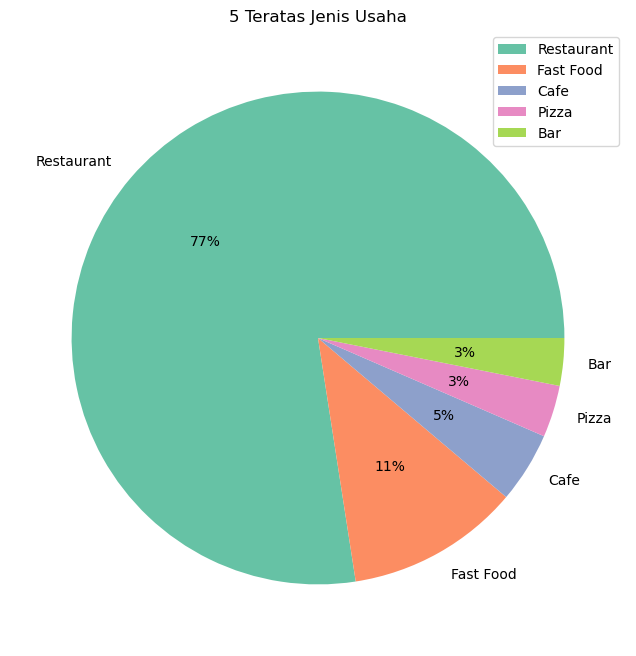

In [15]:
# Ukuran grafik
plt.figure(figsize=(8,8))

# Mengganti warna grafik
colors_ = sns.color_palette('Set2')

# Pie chart
plt.pie(top_5_obj['id'], labels =top_5_obj['object_type'], colors = colors_, autopct='%.0f%%')

# Judul grafik
plt.title("5 Teratas Jenis Usaha")

# Legend grafik
plt.legend()

# Menampilkan grafik
plt.show()

*Findings*:
1. Dari tabel, dapat disimpulkan bahwa jenis usaha yang paling umum di LA adalah Restoran dengan jumlah sebanyak 7253.
2. Jenis usaha kedua yang paling umum adalah Fast Food dengan jumlah sebanyak 1066. 
3. Kafe adalah jenis usaha ketiga yang paling umum dengan jumlah sebanyak 435, diikuti oleh Pizza dengan jumlah 319, dan Bar dengan jumlah 292 adalah jenis usaha yang paling jarang ditemukan.

*Insights*:
1. Berdasarkan data ini, dapat disimpulkan bahwa di LA kondisi pasar adalah *higly saturated* atau telah diisi dengan restoran-restoran yang sudah ada, sehingga dapat menjadi tantangan bagi keberhasilan kafe baru.
2. Namun, keunikan konsep kafe baru, seperti menggunakan robot sebagai pelayan atau pramusaji, dapat membantu membedakan kafe tersebut dari restoran lain dan secara potensial menarik pelanggan.

[Kembali ke tahapan](#back)

### Proporsi dari jenis usaha berbasis waralaba dan non-waralaba <a id="2"></a>

In [16]:
# Agg berdasarkan kolom `chain`
rest_ch = (df_rest_fx.groupby('chain').agg({
    'id':'count'
}).reset_index())

In [17]:
# Memeriksa hasilnya
rest_ch

,chain,id
0,False,5972
1,True,3676


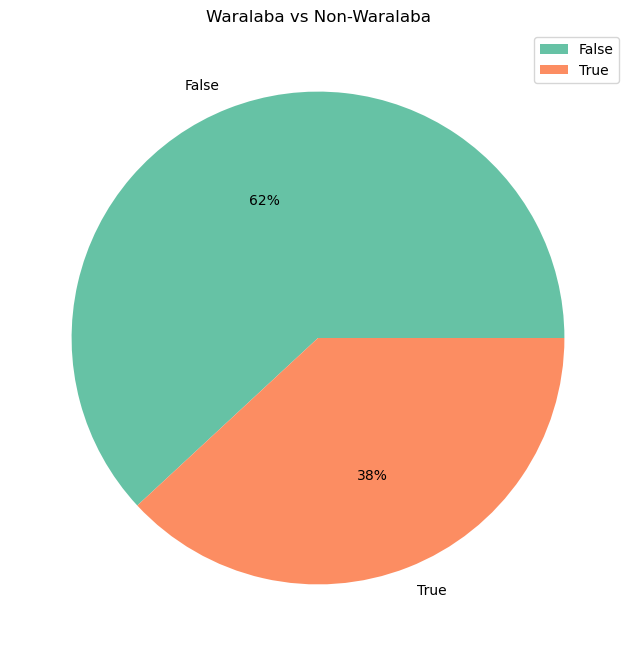

In [18]:
# Ukuran grafik
plt.figure(figsize=(8,8))

# Mengganti warna grafik
colors_ = sns.color_palette('Set2')

# Pie chart
plt.pie(rest_ch['id'], labels =rest_ch['chain'], colors = colors_, autopct='%.0f%%')

# Judul grafik
plt.title("Waralaba vs Non-Waralaba")

# Legend grafik
plt.legend()

# Menampilkan grafik
plt.show()

*Findings*:
1. Dari tabel, dapat disimpulkan bahwa jenis usaha yang ada di LA didominasi oleh jenis usaha dengan basis *chain* atau waralaba yang memiliki jumlah sebanyak 5972 atau 62% dari keseluruhan jenis usaha.
2. Disisi lain jenis usaha dengan basis *non-chain* atau non-waralaba sebanyak 3676 atau 38% dari keseluruhan jenis usaha.

*Insight*:
1. Dapat disimpulkan bahwa jumlah jenis usaha yang termasuk dalam waralaba relatif lebih kecil dibandingkan dengan jumlah jenis usaha yang tidak termasuk dalam waralaba.
2. Informasi ini dapat memberikan wawasan tentang tingkat persaingan yang akan dihadapi oleh kafe baru. Menjadi jenis usaha non-waralaba dapat menjadi keuntungan bagi kafe baru karena dapat membantu membedakannya dari jenis usaha waralaba lain di pasar.
3. Namun, analisis lebih lanjut terhadap pasar target, preferensi pelanggan, dan persaingan diperlukan untuk menentukan kelayakan proyek.

[Kembali ke tahapan](#back)

### Jenis usaha yang biasanya merupakan waralaba <a id="3"></a>

In [19]:
# Filter data
rest_filt_ch = df_rest_fx.loc[df_rest_fx['chain']==True]

In [20]:
# Agg berdasarkan jenis usaha
rest_obj_ch = (rest_filt_ch.groupby('object_type').agg({
    'id' : 'count'
}).reset_index())

In [21]:
# 5 Jenis usaha teratas
top_5_obj_ch = rest_obj_ch.sort_values(by='id', ascending=False).head()

# Menampilkan hasilnya
top_5_obj_ch

,object_type,id
5,Restaurant,2292
3,Fast Food,605
0,Bakery,283
2,Cafe,266
4,Pizza,153


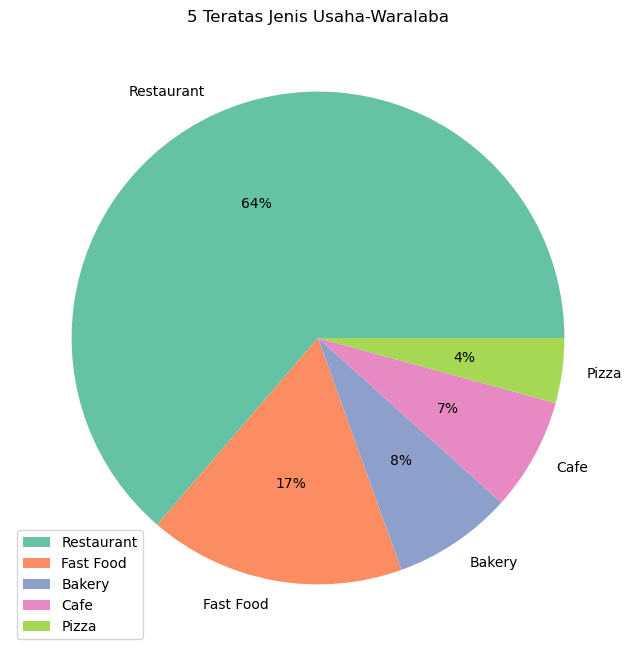

In [22]:
# Ukuran grafik
plt.figure(figsize=(8,8))

# Mengganti warna grafik
colors_ = sns.color_palette('Set2')

# Pie chart
plt.pie(top_5_obj_ch['id'], labels =top_5_obj_ch['object_type'], colors = colors_, autopct='%.0f%%')

# Judul grafik
plt.title("5 Teratas Jenis Usaha-Waralaba")

# Legend grafik
plt.legend()

# Menampilkan grafik
plt.show()

*Findings*:
1. Dari tabel tersebut, dapat disimpulkan bahwa jenis usaha yang termasuk dalam waralaba (chain) yang paling umum di LA adalah jenis usaha restaurant dengan jumlah sebanyak 2292 atau sebanyak 64%.
2. Jenis usaha kedua yang paling umum adalah fast food dengan jumlah sebanyak 605 atau sebanyak 17%.
3. Kemudian diikuti oleh bakery dengan jumlah 283 (8%), cafe sebanyak 266 (7%), dan pizza dengan jumlah 153 (4%).

*Insight*:
1. Informasi ini dapat memberikan gambaran tentang dominasi jenis-jenis restoran dalam waralaba di LA dan menunjukkan bahwa jenis usaha yang paling umum di jenis usaha waralaba adalah jenis usaha yang menyajikan makanan umum atau standar, seperti restaurant dan fast food.
2. Namun, informasi ini hanya memberikan gambaran awal dan analisis lebih lanjut diperlukan untuk memahami secara lebih rinci persaingan yang ada di pasar restoran Los Angeles.

[Kembali ke tahapan](#back)

### Ciri-ciri dari jenis usaha berbasis waralaba <a id="4"></a>
Menganalisa dari dua hal berikut untuk menentukan ciri-ciri dari usaha berbasis rantai: 
- memiliki banyak tempat dengan jumlah kursi yang sedikit, atau
- memiliki beberapa tempat dengan jumlah kursi yang banyak

In [23]:
# Rata-rata kursi pada jenis usaha berbasis waralaba
round(rest_filt_ch.number.mean())

40

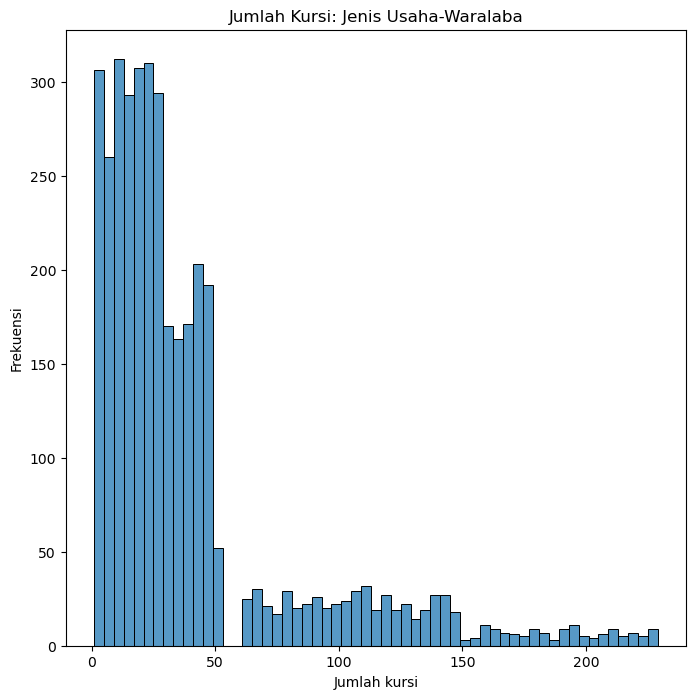

In [24]:
# Ukuran grafik
plt.figure(figsize=(8,8))

# Grafik
sns.histplot(rest_filt_ch.number)

# Judul grafik
plt.title("Jumlah Kursi: Jenis Usaha-Waralaba")

# Penamaan pada x,y-axis
plt.xlabel('Jumlah kursi')
plt.ylabel('Frekuensi')

# Menampilkan grafik
plt.show()

In [25]:
# Agg setiap jenis usaha
rest_filt_ch.groupby('object_type').agg({
    'id':'count',
    'number':'mean'
}).sort_values(by='number', ascending=False)

,id,number
object_type,,
Restaurant,2292,44.856021
Bar,77,40.259740
Fast Food,605,38.089256
Cafe,266,25.917293
Pizza,153,25.529412
Bakery,283,21.773852


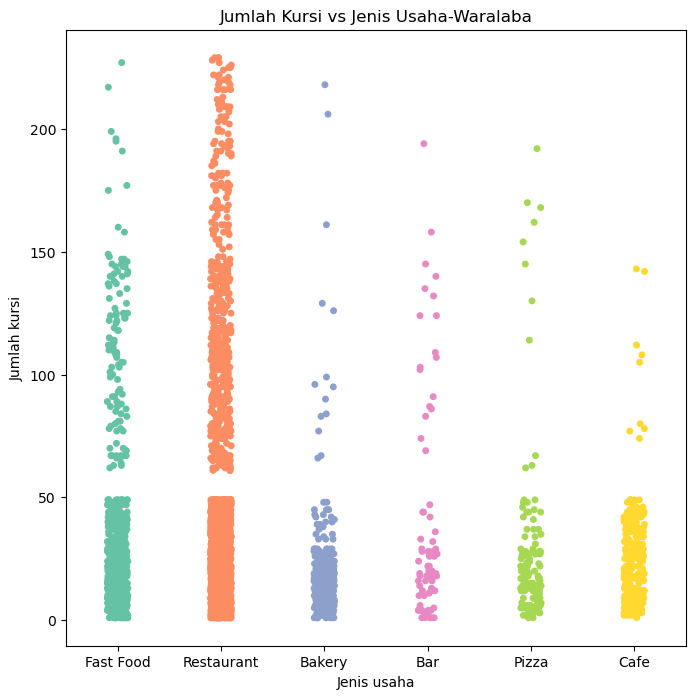

In [26]:
# Ukuran grafik
plt.figure(figsize=(8,8))

sns.stripplot(x="object_type", y="number", data=rest_filt_ch, palette="Set2")

# Mengganti warna grafik
sns.color_palette('Set2')

# Judul grafik
plt.title("Jumlah Kursi vs Jenis Usaha-Waralaba")

# Penamaan pada x,y-axis
plt.xlabel('Jenis usaha')
plt.ylabel('Jumlah kursi')

# Menampilkan grafik
plt.show()

*Findings*:
1. Dapat dilihat dari rata-rata keseluruhan jumlah kursi yang hanya sekitar 40 dan setiap jenis usaha memiliki jumlah kursi antara 1-50.
2. Jika dilihat lebih dalam tabel, dapat dilihat bahwa jenis usaha restaurant memiliki rata-rata jumlah kursi tertinggi yaitu sekitar 45 kursi, sedangkan bakery memiliki rata-rata jumlah kursi terendah yaitu sekitar 22 kursi. Namun, semua jenis usaha tersebut memiliki jumlah kursi yang berkisar antara 1-50.

*Insight*:
1. Dari hasil analisa dapat ditarik kesimpulan bahwa usaha berbasis waralaba cenderung memiliki banyak tempat dengan jumlah kursi yang sedikit. Oleh karena itu, jika ada rencana untuk membuka usaha berbasis waralaba, perlu mempertimbangkan faktor tersebut dalam perencanaan ruang dan fasilitas.

[Kembali ke tahapan](#back)

### Jumlah rata-rata kursi untuk setiap jenis usaha <a id="5"></a>

In [27]:
# Agg dataset berdasarkan jenis usaha
rest_nmb = (df_rest_fx.groupby('object_type').agg({
    'number' : 'mean'
}).reset_index())

In [28]:
# 5 Jenis usaha teratas berdasarkan jumlah kursi
rest_nmb_sort = rest_nmb.sort_values(by='number', ascending=False)

In [29]:
# Membulatkan nilainya
rest_nmb_sort['number'] = round(rest_nmb_sort.number).astype('int')

In [30]:
# Memeriksa hasilnya
rest_nmb_sort

,object_type,number
5,Restaurant,48
1,Bar,45
3,Fast Food,32
4,Pizza,29
2,Cafe,25
0,Bakery,22


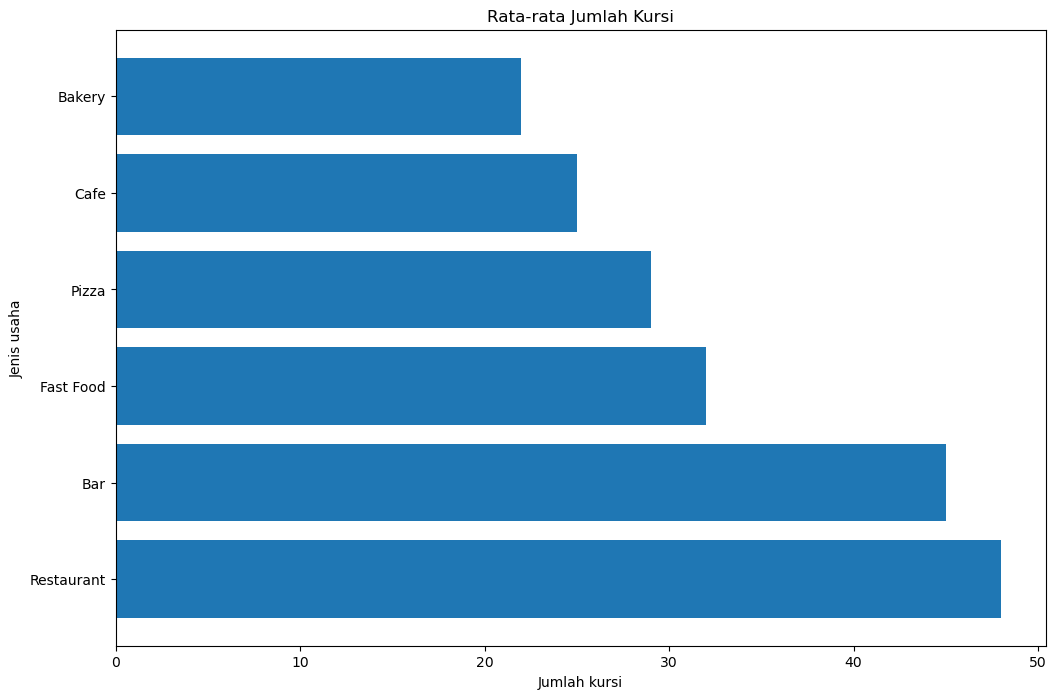

In [31]:
# Ukuran grafik
plt.figure(figsize=(12,8))

# Horizontal bars
plt.barh(y=rest_nmb_sort.object_type, width=rest_nmb_sort.number)

# Judul grafik
plt.title("Rata-rata Jumlah Kursi")

# Create names on the x,y-axis
plt.xlabel('Jumlah kursi')
plt.ylabel('Jenis usaha')

# Menampilkan grafik
plt.show()

*Findings*:
1. Dapat dilihat bahwa jenis usaha restaurant memiliki rata-rata jumlah kursi tertinggi yaitu sekitar 48, diikuti oleh bar dengan rata-rata jumlah kursi sekitar 45.
2. Sementara itu, cafe memiliki rata-rata jumlah kursi terendah yaitu sekitar 25, diikuti oleh bakery dengan rata-rata jumlah kursi sekitar 22.

*Insight*:
1. Dapat disimpulkan bahwa restoran dan bar cenderung memiliki jumlah kursi yang lebih banyak dibandingkan dengan jenis usaha lainnya seperti cafe dan bakery.
2. Sementara itu, jenis usaha seperti fast food dan pizza memiliki rata-rata jumlah kursi yang berada di tengah-tengah.
3. Informasi ini dapat membantu dalam perencanaan dan pengembangan usaha kafe baru dengan mengoptimalkan jumlah kursi yang disediakan berdasarkan jenis usaha dan preferensi pelanggan.
4. Selain itu, analisis lebih lanjut terhadap preferensi pelanggan dan persaingan di pasar juga perlu dilakukan untuk memastikan keberhasilan usaha.

[Kembali ke tahapan](#back)

### Sepuluh nama jalan terbaik berdasarkan jumlah jenis usaha <a id="6"></a>

**Memisahkan nama jalan**

In [32]:
# Sampel data
df_rest_fx.address.sample(10)

4550    3959 WILSHIRE BLVD STE A11
2296           2851 W OLYMPIC BLVD
9517            8020 S VERMONT AVE
4487            3319 WILSHIRE BLVD
3415      3420 W SLAUSON AVE STE A
1276              2528 S GRAND AVE
2119            1040 S WESTERN AVE
5399              541 S INDIANA ST
867      833 S WESTERN AVE STE #40
3869            1538 W SUNSET BLVD
Name: address, dtype: object

In [33]:
# Fungsi untuk melakukan filter string dengan usaddress library
'''
Definisi:
-----------
    Fungsi untuk melakukan filter string dengan usaddress library
-----------
    parsed_address:
        kolom alamat yang sudah dipisahkan
    address:
        referensi kolom alamat yang belum dipisahkan
'''
def get_street_name(parsed_address, address):
    
    # Setelah melakukan beberapa percobaan OLVERA ST dan 1/2 LOS ANGELES me-return hasil yang kurang bagus
    # jadi address tersebut dikecualikan dengan melakukan beberapa kondisi
    if "OLVERA ST" in address:
        return "OLVERA ST"
    elif "1/2 LOS ANGELES" in address:
        return "1/2 LOS ANGELES ST"
    
    else:
        # list kosong
        street_components = []
        
        # Loop pada setiap component dalam parsed address
        for component in parsed_address:
            
            # Memeriksa jika component adalah component nama jalan pada library usaddress
            if component[1] in ['StreetNamePreDirectional', 'StreetName', 'StreetNamePostType', 'StreetNamePostDirectional']:
                
                # Menambahkan hasilnya pada list kosong street_components
                street_components.append(component[0])
        return ' '.join(street_components)

In [34]:
# Menggunakan library usaddress parse untuk mendapatkan komponen address pada kolom `address`
parsed_addresses = [usaddress.parse(addr) for addr in df_rest_fx['address']]

# Menggunakan fungsi get_street_name untuk mendapat nama jalan
# dengan cara mencocokkan hasil dari parsed_addresses dengan nilai dari kolom `address`
# zip menggabungkan list dari variabel parsed_addresses, dan df_rest_fx.address
df_rest_fx['street_name'] = [get_street_name(parsed_addr, addr) for parsed_addr, addr in zip(parsed_addresses, df_rest_fx['address'])]

In [35]:
# Referensi untuk memeriksa hasil dari fungsi dan hasil dari pemeriksaan
# terdapat beberapa jalan yang perlu diperbaiki

# Kode ini untuk memeriksa setiap alamat
# temp = df_rest_fx['street_name'].value_counts()
# pd.DataFrame(temp.loc[temp == 1].index.unique())
# df_rest_fx.loc[df_rest_fx['address'].str.contains('JAPANESE VLG'), ['address','street_name']]
# df_rest_fx.loc[df_rest_fx['street_name']=='CENTURY park E', ['address','street_name']]

# Setelah diperiksa terdapat beberapa value dari kolom `street_name` yang bisa diperbaiki
# 505 -> WESTWOOD PLZ
# OF THE STARS -> AVENUE OF THE STARS
# E PLZ MALL -> E JAPANESE VLG
# JAPANESE VILLAGE PLAZA MALL -> JAPANESE VLG PLZ MALL
# E 11th ST-> E 11TH ST
# N vine ST-> N VINE ST
# W 8th ST-> W 8TH ST
# Z00 DR -> ZOO DR
# ST. VINCENT CT->ST VINCENT CT
# S LOS ANGELES->S LOS ANGELES ST
# LOS ANGELES STS->LOS ANGELES ST
# 3/4 WALL ST->WALL ST
# W pico BLVD->W PICO BLVD
# 3/4 1ST ST->1ST ST
# 1/4 1ST ST->1ST ST
# E CENTURY park->E CENTURY PARK
# W JAMES M. WOOD BLVD->W JAMES M WOOD BLVD
# hollywood BLVD->HOLLYWOOD BLVD
# CENTURY park E->CENTURY PARK E
# JAMES M. WOOD BLVD->JAMES M WOOD BLVD
# 1/4 FAIR PARK AVE->FAIR PARK AVE
# W sunset BLVD->W SUNSET BLVD

In [36]:
# Memperbaiki hasil
df_rest_fx['street_name'] = df_rest_fx['street_name'].replace({
    '505': 'WESTWOOD PLZ',
    'OF THE STARS' : 'AVENUE OF THE STARS',
    'E PLZ MALL' : 'E JAPANESE VLG',
    'JAPANESE VILLAGE PLAZA MALL' : 'JAPANESE VLG PLZ MALL',
    'E 11th ST' : 'E 11TH ST',
    'N vine ST' : 'N VINE ST',
    'W 8th ST' : 'W 8TH ST',
    'Z00 DR' : 'ZOO DR',
    'ST. VINCENT CT' : 'ST VINCENT CT',
    'S LOS ANGELES': 'S LOS ANGELES ST',
    'LOS ANGELES STS' : 'LOS ANGELES ST',
    'W pico BLVD' : 'W PICO BLVD',
    'E CENTURY park' : 'E CENTURY PARK',
    'W JAMES M. WOOD BLVD' : 'W JAMES M WOOD BLVD',
    'hollywood BLVD' : 'HOLLYWOOD BLVD',
    'CENTURY park E' : 'CENTURY PARK E',
    'JAMES M. WOOD BLVD' : 'JAMES M WOOD BLVD',
    '1/4 FAIR PARK AVE' : 'FAIR PARK AVE',
    'W sunset BLVD': 'W SUNSET BLVD'
})

In [37]:
# Sampel data
df_rest_fx['street_name'].sample(5)

618     W MANCHESTER AVE
1569            E 9TH ST
1342       WILSHIRE BLVD
8195       N VERMONT AVE
4131      S BROADWAY AVE
Name: street_name, dtype: object

**10 jalan terbaik berdasarkan jenis usaha**

In [38]:
# Agg berdasarkan nama jalan
rest_st_nmb = (df_rest_fx.groupby('street_name').agg({
    'id':'count'
}).reset_index())

In [39]:
# 10 nama jalan teratas berdasarkan jumlah restoran
top_10_st = rest_st_nmb.sort_values(by='id', ascending=False).head(10)

In [40]:
# Menampilkan hasilnya
top_10_st

,street_name,id
764,WILSHIRE BLVD,384
732,W SUNSET BLVD,369
726,W PICO BLVD,342
577,S WESTERN AVE,276
590,SANTA MONICA BLVD,260
219,HOLLYWOOD BLVD,242
724,W OLYMPIC BLVD,233
655,W 3RD ST,230
491,S FIGUEROA ST,228
570,S VERMONT AVE,212


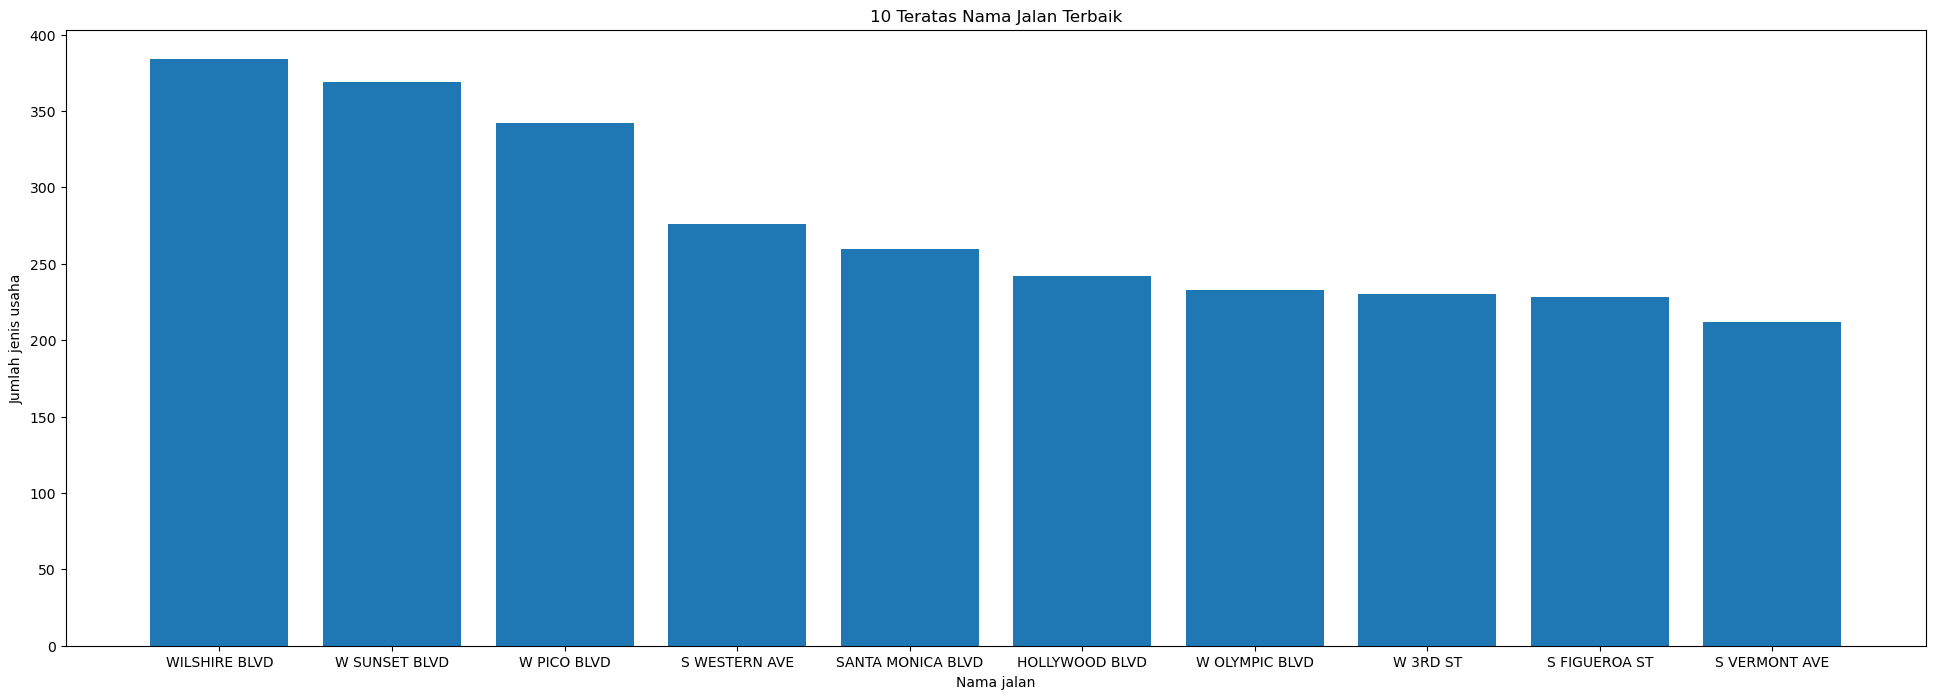

In [41]:
# Ukuran grafik
plt.figure(figsize=(24,8))

# Bar chart
plt.bar(top_10_st.street_name, height=top_10_st.id)

# Judul grafik
plt.title("10 Teratas Nama Jalan Terbaik")

# Penamaan pada x,y-axis
plt.xlabel('Nama jalan')
plt.ylabel('Jumlah jenis usaha')

# Menampilkan grafik
plt.show()

*Findings*:
1. Dapat dilihat sepuluh nama jalan dengan jumlah jenis usaha terbanyak di LA. WILSHIRE BLVD adalah nama jalan dengan jumlah jenis usaha terbanyak, diikuti oleh W SUNSET BLVD, W PICO BLVD, S WESTERN AVE, SANTA MONICA BLVD

*Insight*:
1. Hasil analisis ini dapat memberikan informasi penting bagi pengusaha dalam menentukan lokasi strategis untuk membuka usaha baru.
2. Pengusaha dapat mempertimbangkan nama jalan dengan jumlah jenis usaha yang tinggi untuk menarik lebih banyak pelanggan dan memaksimalkan keuntungan.
3. Namun, pengusaha juga perlu mempertimbangkan faktor lain seperti persaingan dan preferensi pelanggan dalam menentukan lokasi usaha yang ideal.

[Kembali ke tahapan](#back)

### Jumlah jalan yang hanya memiliki satu jenis usaha <a id="7"></a>

In [42]:
# Filter data
rest_st_nmb.loc[rest_st_nmb['id']==1][['street_name']]

,street_name
0,1/2 LOS ANGELES ST
1,1/4 1ST ST
2,1ST ST
3,2 BLVD
4,2ND ST
...,...
754,WESTERN HERITAGE WAY
760,WILEY POST AVE
761,WILLOW ST
763,WILSHIRE


*Findings*:
1. dapat disimpulkan bahwa sebanyak 340 jalan di Los Angeles hanya memiliki satu restoran di sepanjang jalan tersebut. Hal ini dapat memberikan beberapa informasi bagi pengusaha yang ingin membuka usaha restoran di Los Angeles.

*Insight*:
1. lokasi yang memiliki banyak jenis usaha di sekitarnya mungkin akan lebih menarik bagi konsumen, karena dapat menawarkan banyak pilihan menu dan suasana yang beragam. Namun, pengusaha juga perlu mempertimbangkan persaingan yang ketat di daerah tersebut.
2. lokasi yang hanya memiliki satu jenis usaha di sekitarnya mungkin dapat menawarkan pasar yang belum terpenuhi. Namun, pengusaha perlu memastikan bahwa usaha mereka dapat menarik pelanggan yang cukup untuk mempertahankan keberlangsungan usaha.
3. Dalam kedua kasus di atas, pengusaha perlu mempertimbangkan faktor lain seperti biaya sewa, aksesibilitas, dan target pasar dalam memilih lokasi usaha yang ideal.

[Kembali ke tahapan](#back)

### Distribusi jumlah kursi pada jalan yang dihuni oleh banyak jenis usaha <a id="8"></a>

**Jalan WILSHIRE BLVD, W SUNSET BLVD, dan W PICO BLVD**

In [43]:
# Fungsi untuk menghasilkan agg number berdasarkan kolom `object_type`
'''
Definisi:
-----------
    Fungsi untuk menghasilkan agg number berdasarkan kolom `object_type`
-----------
    df:
        data yang diinginkan
    street_name:
        nama jalan yang diinginkan
'''
def agg_by_street(df, street_name):
    if street_name == 'WILSHIRE BLVD':
        filtered_df = df.loc[df['street_name'] == 'WILSHIRE BLVD']
    elif street_name == 'W SUNSET BLVD' or street_name == 'W PICO BLVD':
        filtered_df = df.loc[df['street_name'] == street_name]
    else:
        raise ValueError('Invalid street name')
    
    # Agg berdasarkan nama jalan dan jenis usaha
    agg_df = (filtered_df.groupby(['street_name', 'object_type']).agg({
        'number': 'count'
    }).reset_index()).sort_values(by='number', ascending=False)
    
    return agg_df

In [44]:
# Menerapkan fungsi
obj_wilshire = agg_by_street(df_rest_fx, 'WILSHIRE BLVD')

# Menampilkan hasil
obj_wilshire

,street_name,object_type,number
5,WILSHIRE BLVD,Restaurant,309
3,WILSHIRE BLVD,Fast Food,25
2,WILSHIRE BLVD,Cafe,24
4,WILSHIRE BLVD,Pizza,11
1,WILSHIRE BLVD,Bar,10
0,WILSHIRE BLVD,Bakery,5


In [45]:
# Menerapkan fungsi
obj_sunset = agg_by_street(df_rest_fx, 'W SUNSET BLVD')

# Menampilkan hasil
obj_sunset

,street_name,object_type,number
5,W SUNSET BLVD,Restaurant,272
3,W SUNSET BLVD,Fast Food,31
2,W SUNSET BLVD,Cafe,24
4,W SUNSET BLVD,Pizza,17
1,W SUNSET BLVD,Bar,13
0,W SUNSET BLVD,Bakery,12


In [46]:
# Menerapkan fungsi
obj_pico = agg_by_street(df_rest_fx, 'W PICO BLVD')

# Menampilkan hasil
obj_pico

,street_name,object_type,number
5,W PICO BLVD,Restaurant,257
3,W PICO BLVD,Fast Food,30
4,W PICO BLVD,Pizza,18
0,W PICO BLVD,Bakery,13
2,W PICO BLVD,Cafe,13
1,W PICO BLVD,Bar,11


In [47]:
# Fungsi untuk membuat pie chart sesuai nama jalan
'''
Definisi:
-----------
    Fungsi untuk membuat pie chart sesuai nama jalan
-----------
    df:
        data yang diinginkan
    column:
        Kolom yang ingin digunakan
'''
def plot_pie_charts(df, column):
    
    # Nama jalan
    street_names = ['WILSHIRE BLVD', 'W SUNSET BLVD', 'W PICO BLVD']
    
    # Merubah warna
    colors_ = sns.color_palette('Set2')
    
    # Membuat pie chart
    for street_name in street_names:
        
        # Filter nama jalan
        sub_df = df[df['street_name'] == street_name]
        
        # Memeriksa kondisi nama jalan
        if len(sub_df) == 0:
            continue
        
        # Agg jumlah jenis usaha
        obj_agg = (sub_df.groupby(['street_name', column]).agg({
        'number': 'count'
        }).reset_index())
        
        # Ukuran chart
        plt.figure(figsize=(8,8))
        
        # Pie chart
        plt.pie(obj_agg['number'], labels=obj_agg[column], colors=colors_, autopct='%.0f%%')
        
        # Judul 
        plt.title(f"Jenis Usaha-Jalan {street_name}")
        
        # Legend
        plt.legend()
    return plt.show()

In [48]:
# Filter data
rest_3 = df_rest_fx.loc[df_rest_fx['street_name'].isin(['WILSHIRE BLVD', 'W SUNSET BLVD', 'W PICO BLVD'])]

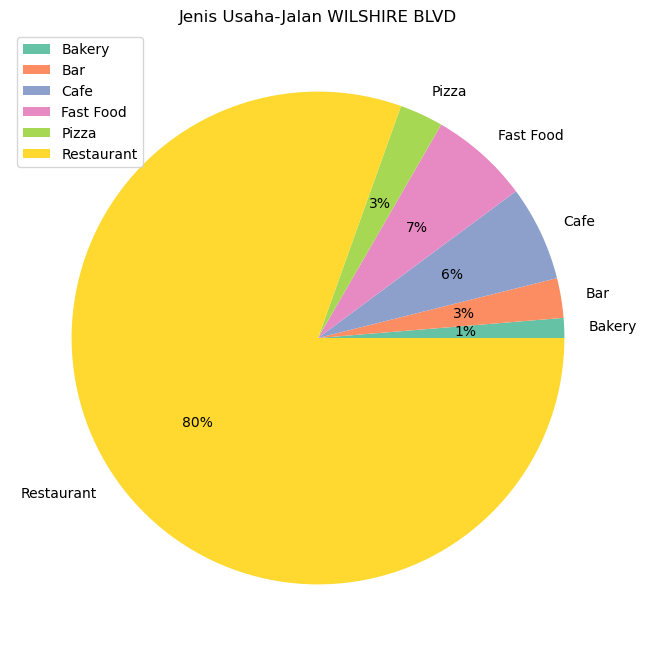

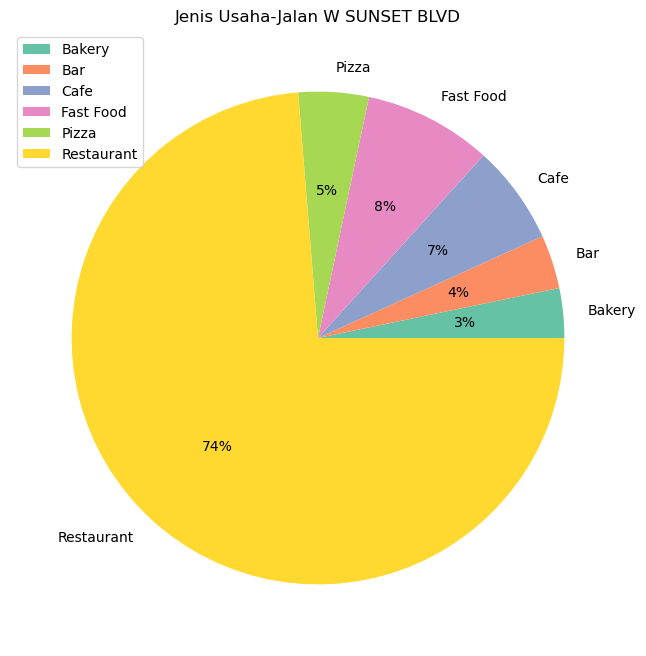

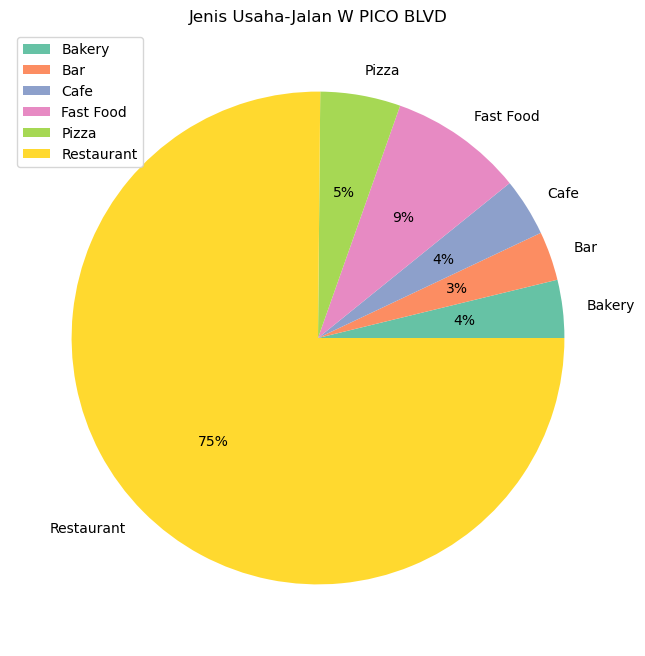

In [49]:
# Menampilkan hasilnya
plot_pie_charts(df=rest_3, column='object_type')

*Findings*:
1. Dari data diatas, dapat diamati bahwa trend jumlah kursi pada setiap jenis usaha pada ketiga jalan tersebut relatif serupa. 
2. Restoran memiliki jumlah kursi terbanyak, diikuti oleh fast food.
3. Pada jalan WILSHIRE BLVD dan W SUNSET BLVD cafe menduduki peringkat ke-3 namun pada jalan W PICO BLVD pizza menjadi jenis usaha yang menduduki peringkat ke 3, dan cafe berada pada peringkat ke-5.
4. Untuk jumlah kursi pada jenis usaha cafe relatif sedikit dibandingkan dengan jenis usaha lainnya. Pada jalan WILSHIRE BLVD misalnya, jumlah kursi pada jenis usaha cafe hanya 24, sementara jenis usaha restaurant mencapai 309 kursi. Hal serupa juga terlihat pada jalan W SUNSET BLVD dan W PICO BLVD.

*Insight*:
1. Oleh karena itu, dapat diasumsikan bahwa tren distribusi dari jumlah kursi pada jalan yang dihuni oleh banyak jenis usaha menunjukkan bahwa jenis usaha cafe relatif memiliki jumlah kursi yang lebih sedikit dibandingkan dengan jenis usaha lainnya.

[Kembali ke tahapan](#back)

## Kesimpulan Umum <a id="Kesimpulan"></a>

Setelah memasukkan dataset kemudian melakukan melakukan pemeriksaan, terdapat nilai yang hilang pada dataset, tidak terdapat duplikasi dan penamaan kolom juga sudah bagus. Nilai yang hilang kemudian berhasil diperbaiki dan dataset pun bisa dianalisa lebih lanjut, Berikut merupakan kesimpulan dari hasil analisa:
1. Restoran merupakan jenis usaha paling populer di kota LA.
2. Jenis usaha non-waralaba atau independen lebih banyak daripada jenis usaha waralaba di kota LA.
3. Umumnya yang merupakan jenis usaha waralaba adalah restaurant.
4. Jenis usaha yang memiliki jumlah kursi lebih banyak cenderung berada pada jenis usaha Restaurant.
5. Terdapat potensi pasar yang belum dimanfaatkan pada jalan-jalan yang hanya memiliki satu jenis usaha di kota LA.
6. Jumlah kursi lebih banyak untuk restoran dan bar
7. Wilshire BLVD, merupakan jalan terbaik berdasarkan jumlah jenis usaha
8. Pada jalan WILSHIRE BLVD, W SUNSET BLVD, dan W PICO BLVD tren jumlah kursi relatif serupa, untuk jenis usaha cafe memiliki tren dengan jumlah kursi yang relatif sedikit dibandingkan jenis usaha lainnya.


[Kembali ke tahapan](#back)

------

## Presentasi<a id="Presentasi"></a>

Presentasi: Hasil Analisa Riset Pasar <https://drive.google.com/file/d/1eV4xdekpOIl8ZwgPiR99qo7l0NtRcb2-/view?usp=sharing>

[Kembali ke tahapan](#back)